In [76]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [71]:
train_dir = "./sign_mnist_train.csv"
test_dir = "./sign_mnist_test.csv"

In [72]:
with open(train_dir) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [73]:
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file
  
  Args:
    filename (string): path to the CSV file
    
  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:
    ### START CODE HERE

    # Use csv.reader, passing in the appropriate delimiter
    # Remember that csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file)
    
    labels = []
    images = []
    
    next(csv_reader, None)
    
    for row in csv_reader:
        label = row[0]
        image = row[1:]
        image = np.reshape(image, (28, 28))
        
        labels.append(label)
        images.append(image)
    
    labels = np.array(labels).astype("float")
    images = np.array(images).astype("float")
    
    ### END CODE HERE

    return images, labels

In [74]:
training_images, training_labels = parse_data_from_input(train_dir)
validation_images, validation_labels = parse_data_from_input(test_dir)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


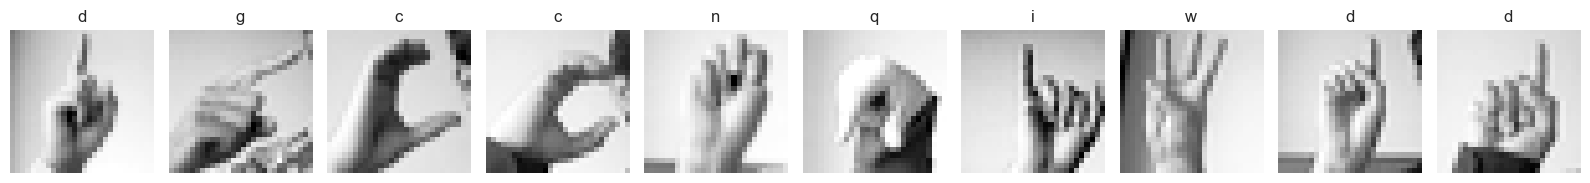

In [80]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

In [87]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    """
    Creates the training and validation data generators

    Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

    Returns:
    train_generator, validation_generator - tuple containing the generators
    """
    ### START CODE HERE

    # In this section you will have to add another dimension to the data
    # So, for example, if your array is (10000, 28, 28)
    # You will need to make it (10000, 28, 28, 1)
    # Hint: np.expand_dims
    training_images = np.expand_dims(training_images, 3)
    validation_images = np.expand_dims(validation_images, 3)

    # Instantiate the ImageDataGenerator class 
    # Don't forget to normalize pixel values 
    # and set arguments to augment the images (if desired)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)


    # Pass in the appropriate arguments to the flow method
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 


    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Pass in the appropriate arguments to the flow method
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

    ### END CODE HERE

    return train_generator, validation_generator

In [88]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [93]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(25, activation="softmax")
    ])
    
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss = "sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [94]:
model = create_model()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("accuracy") > .97):
            model.stop_training = True
            
callback = myCallback()
            
model.fit(train_generator,
         epochs=20,
         validation_data=validation_generator,
         callbacks=callback)

Epoch 1/20
858/858 [==============================] - 18s 20ms/step - loss: 2.5815 - accuracy: 0.2058 - val_loss: 1.8539 - val_accuracy: 0.3756
Epoch 2/20
858/858 [==============================] - 20s 23ms/step - loss: 1.7990 - accuracy: 0.4181 - val_loss: 1.5761 - val_accuracy: 0.5107
Epoch 3/20
858/858 [==============================] - 20s 24ms/step - loss: 1.3780 - accuracy: 0.5480 - val_loss: 0.8905 - val_accuracy: 0.6755
Epoch 4/20
858/858 [==============================] - 20s 23ms/step - loss: 1.1133 - accuracy: 0.6310 - val_loss: 0.6734 - val_accuracy: 0.7632
Epoch 5/20
858/858 [==============================] - 20s 24ms/step - loss: 0.9418 - accuracy: 0.6918 - val_loss: 0.5793 - val_accuracy: 0.8185
Epoch 6/20
858/858 [==============================] - 20s 24ms/step - loss: 0.8117 - accuracy: 0.7309 - val_loss: 0.4443 - val_accuracy: 0.8496
Epoch 7/20
858/858 [==============================] - 20s 24ms/step - loss: 0.7069 - accuracy: 0.7631 - val_loss: 0.3378 - val_accuracy:

In [122]:
import cv2
from IPython.display import clear_output
import time
from tensorflow.keras.utils import img_to_array

cap = cv2.VideoCapture(0)
cap.set(3,640) # adjust width
cap.set(4,480) # adjust height

def useModel(img):
    img = np.resize(img, (28, 28, 28))
    
    x = img_to_array(img)
    
    
    images = np.vstack([x])
    c = model.predict(images)
    print(c)
    
try:
    while True:
        clear_output(wait=True)
        success, img = cap.read()
        cv2.imshow("Webcam", img) # This will open an independent window
        useModel(img);
        if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
            cap.release()
            break
except Exception as e:
    cv2.destroyAllWindows() 
    cv2.waitKey(1)
    print(e)
        
cv2.destroyAllWindows() 
cv2.waitKey(1)

1/1 [==============================] - 0s 21ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.000000

-1